[View in Colaboratory](https://colab.research.google.com/github/jcnrn/f18_ds_nlp/blob/master/CONRAN_NLP_HW1.ipynb)

#Acronym Dictionary

This is an attempt to automatically catalog and define acronyms as found in the Department of Defense Office of Inspector General's reports. To find acronyms, first the sampled documents were ingested using Stephen Kunath's text crawler script and concatenated into one large corpus of text.  

The ingested corpus was then scanned using the Python regex package 're' with the expression "\b[A-Z][a-zA-Z\.]*[A-Z]\b\.?". This regular expression was capable of finding 4253 acronyms. Given the similar nature of the documents and the computational intensity of defining 4253 acronyms, duplicates were assumed to share the same definition and were removed. Then to index the location of the first mention of the acronym, a text parser was used to locate the acronym and find the last mentioned report date. While some dates have multiple reports, this still provides a fairly close indexing of where the acronym can be found. Finally, using Stephen Kunath's acronym definition script, the definitions of the 344 acronyms were assessed.

These three lists of acronym, date, and definition were added to a Pandas dataframe and exported as a csv.

For questions, please contact Joseph Conran joe.conran@gmail.com

*Please note that 344 acronyms is still fairly intense computationally. It is recommended that a slice of these acronyms is used instead of the full list.

In [44]:
#command line code
!pip install nltk
!pip install datefinder
!pip install progressbar
!git clone https://github.com/jcnrn/f18_ds_nlp.git


fatal: destination path 'f18_ds_nlp' already exists and is not an empty directory.


In [45]:
#install packages
import os
import pandas as pd
import datefinder
from datetime import datetime
import csv
import nltk.data
import re
import progress
from progressbar import ProgressBar
nltk.download('punkt')
from os import listdir
from os.path import isfile, join
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
#change directory to corpus
os.chdir('f18_ds_nlp/homework/homework_1/data')
os.getcwd()

'/content/f18_ds_nlp/homework/homework_1/data/f18_ds_nlp/homework/homework_1/data'

In [47]:
#concatenate text documents into one string (taken from https://github.com/sk-gw-ds-nlp)
dir_base = "/content/f18_ds_nlp/homework/homework_1/data"


def read_file(filename):
    input_file_text = open(filename , encoding='utf-8').read()
    return input_file_text

    
def read_directory_files(directory):
    file_texts = ""
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    for f in files:
        file_texts += read_file(join(directory, f) )
    return file_texts
    
text_corpus = read_directory_files(dir_base)
print(text_corpus)




June 29, 2018  —



Objective:
We determined whether the Army maintained and accounted for Army Prepositioned Stock-5 (APS-5) equipment in Kuwait and Qatar. We focused on APS-5 program equipment because the majority of Army support equipment stored and maintained in Kuwait and Qatar is APS equipment.
Background:
The APS program is part of the Army’s strategy to maintain combat-ready equipment in strategic locations around the world. The Army’s Care of Supplies in Storage (COSIS) program ensures the readiness of the Army’s stored supplies by identifying and mitigating exposure to temperature, humidity, and other environmental factors so that items in storage remain serviceable and ready to deploy when needed. Army Technical Manual (TM) 38-470 establishes COSIS-prescribed cyclic maintenance schedules for tactical and combat equipment that the Army and supporting contractors are required to implement. 
Army Contracting Command–Rock Island (ACC‑RI) awarded URS Federal Services (URS) a c

[(('of', 'the'), 717), ((',', 'and'), 673), (('.', 'The'), 508), ((',', 'the'), 471), (('that', 'the'), 460), (('did', 'not'), 445), (('to', 'the'), 321), (('.', 'We'), 299), (('for', 'the'), 279), (('with', 'the'), 261), (('in', 'the'), 251), (('’', 's'), 229), (('and', 'the'), 197), (('the', 'DoD'), 195), ((',', 'we'), 186), (('.', 'In'), 185), (('the', 'Army'), 181), (('the', 'recommendation'), 171), (('In', 'addition'), 160), (('Secretary', 'of'), 160)]


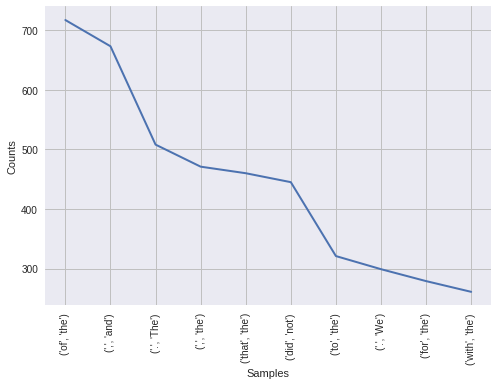

In [48]:
#a little exploratory analyses for fun (https://github.com/sk-gw-ds-nlp)
punkt_sentences = sentence_tokenizer.tokenize(text_corpus)
sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
all_tokens = [word for sentence in sentences_words for word in sentence]
bigrams = nltk.bigrams(all_tokens)
freq_bi = nltk.FreqDist(bigrams)

print(freq_bi.most_common(20))
freq_bi.plot(10)

In [49]:
#more exploratory analyses for fun (https://github.com/sk-gw-ds-nlp)
print(freq_bi.hapaxes())
print(freq_bi.N())
print(freq_bi.freq(('june', '29')))

[('June', '29'), ('Army', 'maintained'), ('maintained', 'and'), ('Prepositioned', 'Stock-5'), ('Stock-5', '('), ('(', 'APS-5'), ('APS-5', ')'), ('on', 'APS-5'), ('APS-5', 'program'), ('program', 'equipment'), ('Army', 'support'), ('stored', 'and'), ('Qatar', 'is'), ('is', 'APS'), ('The', 'APS'), ('APS', 'program'), ('s', 'strategy'), ('maintain', 'combat-ready'), ('combat-ready', 'equipment'), ('in', 'strategic'), ('strategic', 'locations'), ('locations', 'around'), ('s', 'Care'), ('Storage', '('), ('(', 'COSIS'), ('COSIS', ')'), ('program', 'ensures'), ('ensures', 'the'), ('readiness', 'of'), ('s', 'stored'), ('stored', 'supplies'), ('supplies', 'by'), ('mitigating', 'exposure'), ('exposure', 'to'), ('to', 'temperature'), ('temperature', ','), (',', 'humidity'), ('humidity', ','), ('environmental', 'factors'), ('factors', 'so'), ('so', 'that'), ('in', 'storage'), ('storage', 'remain'), ('remain', 'serviceable'), ('serviceable', 'and'), ('and', 'ready'), ('ready', 'to'), ('to', 'deploy

In [11]:
#develop acronym finder
#https://stackoverflow.com/questions/35218380/correct-regex-for-acronyms-in-python/35218811
regex = r"\b[A-Z][a-zA-Z\.]*[A-Z]\b\.?"
acronyms = re.findall(regex, text_corpus)
print(acronyms)





['APS', 'APS', 'APS', 'APS', 'COSIS', 'TM', 'COSIS', 'ACC', 'RI', 'URS', 'URS', 'PWS', 'URS', 'TM', 'URS', 'APS', 'AFSB', 'TM', 'AFSB', 'APS', 'APS', 'APS', 'APS.', 'APS', 'APS', 'APS', 'U.S.', 'APS', 'TM', 'APS', 'APS', 'TM', 'APS', 'U.S.', 'U.S.', 'U.S.', 'USAFMCOM', 'GFEBS', 'DoD', 'FY', 'FY', 'FMSU', 'LDA.', 'DoD', 'FMSU', 'FMSU', 'U.S.', 'ODCFO', 'DoD', 'DASA', 'FO', 'DoD', 'FMR', 'FMSC', 'ODCFO', 'DoD', 'FMR', 'FMSU', 'U.S.', 'DFAS', 'U.S.', 'USACE', 'DoD', 'FMR.', 'FMSU', 'U.S.', 'USACE', 'FMSC', 'U.S.', 'USAFMCOM', 'DoD', 'FMR.', 'DASA', 'FO', 'USAFMCOM', 'USACE', 'DFAS', 'FMSU', 'FMSC', 'ODCFO', 'ODCFO', 'DoD', 'DoD', 'DoD', 'DON', 'DON', 'QRP', 'DON', 'QRP', 'QRP', 'DON', 'DON', 'QRP', 'QRP', 'QRP.', 'QRP', 'QRP', 'QRP', 'QRP', 'QRP', 'QRP', 'DON', 'DON', 'DON', 'QRP.', 'U.S.', 'QRP', 'FMO', 'DON', 'FMO', 'FMO', 'U.S.', 'QRP', 'QRP', 'FOID', 'DLA', 'ESPC', 'ESPC', 'ESPC', 'ESPC.', 'ESPC', 'ESPC.', 'DLA', 'DLA', 'DPW', 'DLA', 'ESPC.', 'DLA', 'DLA', 'DPW', 'DLA', 'DPW', 'DLA', 

In [50]:
#create dataframe of acronyms and remove duplicates
#this could be problematic if acronyms have different meanings
df=pd.DataFrame()
df['acronym'] = acronyms
print('before', len(df))
df=df.drop_duplicates()
print('after', len(df))
print(df.tail(5))

before 4253
after 344
     acronym
4152     P.C
4155     UAV
4219     ODL
4231     HIV
4239   WRAIR


In [13]:
#date matcher test for acronym. seems to report last given date in corpus before which the acronym is found
#this method of indexing is extremely crude and doesn't necessarily align with where the definition will be found
  acro = 'HIV'
  beforeAcro, acro, afterAcro = text_corpus.partition(acro)
  #print(beforeAcro)
  dates = datefinder.find_dates(beforeAcro)
  for match in dates:
    lastDate = (match)
print(acro, lastDate)

HIV 2017-03-14 00:00:00


In [14]:
#testing a for loop
date = []
for row in df['acronym']:
  date.append(row)
print(len(date))
print(date)


344
['APS', 'COSIS', 'TM', 'ACC', 'RI', 'URS', 'PWS', 'AFSB', 'APS.', 'U.S.', 'USAFMCOM', 'GFEBS', 'DoD', 'FY', 'FMSU', 'LDA.', 'ODCFO', 'DASA', 'FO', 'FMR', 'FMSC', 'DFAS', 'USACE', 'FMR.', 'DON', 'QRP', 'QRP.', 'FMO', 'FOID', 'DLA', 'ESPC', 'ESPC.', 'DPW', 'OFS', 'CoW', 'OCO', 'SABRS', 'SABRS.', 'SOP', 'DISA', 'DCS', 'DCS.', 'ATO', 'ATO.', 'DODIG', 'DHA', 'IT', 'SBA', 'CO', 'HIT', 'SBA.', 'FAR', 'OIG', 'NAVFAC', 'EXWC', 'PWO', 'DCMA', 'BOSS', 'NAVFACMAR', 'P.C.', 'AUAB', 'AUAB.', 'DD', 'GB', 'AR', 'CPRP', 'DP', 'TRICARE', 'JLTV', 'JLTV.', 'PEO', 'CS', 'CSS', 'DLS', 'STR', 'VA', 'VA.', 'USD', 'MEDCOM', 'BUMED', 'PHA', 'IMR', 'STR.', 'ASD', 'HA', 'DATA', 'OMB', 'SAO', 'OUSD', 'AT', 'DPAP', 'OASD', 'AWCF', 'ASA', 'FM', 'ABA', 'DoDIG', 'IN', 'FBWT', 'AGF', 'OASA', 'CFO', 'JROC', 'CH', 'MQ', 'MDAP', 'KC', 'U.S.C.', 'JROC.', 'DoD.', 'U.S.C', 'USSOCOM', 'SOC', 'MARSOC', 'DCFO', 'PP', 'FIAR', 'USSOCOM.', 'DSCA', 'FMS', 'CSTC', 'U.S', 'MoD', 'MoI', 'ANDSF', 'ANDSF.', 'MoI.', 'CISA.', 'CISA', 

In [0]:
#create a copy when/if i screw up 
#use shortened version to test as full is computationally intensive
#dfCopy = df.head(5)
dfCopy = df
#print(dfDates)

In [51]:
#runtime about 5 min
t1 = datetime.now()

#finding date to index acronym document on
#some dates are being added incorrectly
date = []

for row in dfCopy['acronym']:
  acro = row
  beforeAcro, acro, afterAcro = text_corpus.partition(acro)
  dates = datefinder.find_dates(beforeAcro)
  for match in dates:
    lastDate = match
  date.append(match.strftime('%B %d, %Y'))

print(len(date))
print(date)

t2 = datetime.now()
tTotal =t2-t1
print('runtime:', tTotal.seconds, 'seconds')


344
['June 29, 2018', 'June 29, 2018', 'June 29, 2018', 'June 29, 2018', 'June 29, 2018', 'June 29, 2018', 'August 31, 2016', 'September 27, 401', 'September 27, 100', 'September 27, 100', 'March 29, 2018', 'March 29, 2018', 'September 27, 2016', 'September 27, 2016', 'September 27, 176', 'September 27, 176', 'September 27, 176', 'September 27, 176', 'September 27, 176', 'September 27, 176', 'September 27, 266', 'September 27, 176', 'September 27, 176', 'September 27, 176', 'May 10, 2018', 'May 10, 2018', 'May 10, 2018', 'September 27, 7300', 'May 04, 2017', 'July 06, 2018', 'July 06, 2018', 'July 06, 2018', 'September 10, 2018', 'March 16, 2017', 'March 16, 2017', 'March 16, 2017', 'September 27, 2016', 'June 30, 2017', 'September 09, 2018', 'April 07, 2017', 'April 07, 2017', 'April 07, 2017', 'April 07, 2017', 'May 27, 2016', 'September 02, 2018', 'April 13, 2018', 'April 13, 2018', 'May 27, 2018', 'June 29, 2018', 'May 27, 2018', 'July 27, 2017', 'July 27, 2017', 'May 09, 2017', 'S

In [52]:
#adding date column to acronym dictionary
dfCopy['date'] = (date)
print(dfCopy)

       acronym                date
0          APS       June 29, 2018
4        COSIS       June 29, 2018
5           TM       June 29, 2018
7          ACC       June 29, 2018
8           RI       June 29, 2018
9          URS       June 29, 2018
11         PWS     August 31, 2016
16        AFSB   September 27, 401
22        APS.   September 27, 100
26        U.S.   September 27, 100
36    USAFMCOM      March 29, 2018
37       GFEBS      March 29, 2018
38         DoD  September 27, 2016
39          FY  September 27, 2016
41        FMSU   September 27, 176
42        LDA.   September 27, 176
47       ODCFO   September 27, 176
49        DASA   September 27, 176
50          FO   September 27, 176
52         FMR   September 27, 176
53        FMSC   September 27, 266
59        DFAS   September 27, 176
61       USACE   September 27, 176
63        FMR.   September 27, 176
84         DON        May 10, 2018
86         QRP        May 10, 2018
94        QRP.        May 10, 2018
107        FMO  Sept

In [59]:
t1 = datetime.now()


#saving to empty list 'definition'
definition = []

#progress bar #doesn't work
#pbar = ProgressBar()


#created for loop on skunath's acronym finder code (https://github.com/sk-gw-ds-nlp)
input = text_corpus
tokens = treebank_tokenizer.tokenize(input)


for row in dfCopy['acronym']: #for row in pbar(dfCopy['acronym']):
  acronym_letters_index = 0 
  
  acronym = row
  acronym_letters = list(acronym)
  acronym_found = False
  acronym_token_range = None
  
  for index in list(range(0, len(tokens))):
    token = tokens[index] 
    if acronym_letters_index < len(acronym_letters) and token[0].lower() == acronym_letters[acronym_letters_index].lower():
        acronym_letters_index += 1 
        
        acronym_start_index = index
        acronym_end_index = -1 
        
        for acronym_finder_index in list(range(index + 1, len(tokens))): 

            next_token = tokens[acronym_finder_index]
            if acronym_letters_index < len(acronym_letters) and next_token[0].lower() == acronym_letters[acronym_letters_index].lower():

                if (acronym_letters_index + 1 < len(acronym_letters)):
                    acronym_letters_index += 1
                else:
                    acronym_token_range = [acronym_start_index, acronym_finder_index]
                    acronym_found = True
                    acronym_start_index = 0
                    break
            else:
                acronym_letters_index = 0
                break
            

  if acronym_found:
    definition.append(" ".join(tokens[acronym_token_range[0]:acronym_token_range[1]+1]))
  else:
    definition.append("")

    
print(len(definition))
print(definition)

t2 = datetime.now()
tTotal = t2-t1
print('runtime:', tTotal.seconds, 'seconds')

344
['and procedures should', 'Care of Supplies in Storage', 'to move', 'Army Contracting Command', 'recommendation is', 'upload required supporting', 'performance work statement', 'Army Field Support Brigade', '', '', '', 'General Fund Enterprise Business System', 'Department of Defense', 'fiscal year', 'Financial Management Support Unit', '', '', 'documented and supported. Additionally', 'Freedom of', 'Financial Management Regulation', 'Financial Management Support Center', 'detail for ACSA staff', '', '', 'delivery of needed', 'quality review process', '', 'financial management of', '', 'DoD leadership and', 'energy savings performance contracts', '', 'DoD programs. We', 'overpayments from suppliers', 'customer orders were', 'our concerns of', '', '', 'standard operating procedures', 'Defense Information Systems Agency', 'DoD Components should', '', 'and the other', '', 'Department of Defense Inspector General', 'Defense Health Agency', 'including the', 'Support Brigade and', 'copy 

In [60]:
#adding definitions to panda data frame
dfCopy['definition'] = definition
print(dfCopy)

       acronym                date  \
0          APS       June 29, 2018   
4        COSIS       June 29, 2018   
5           TM       June 29, 2018   
7          ACC       June 29, 2018   
8           RI       June 29, 2018   
9          URS       June 29, 2018   
11         PWS     August 31, 2016   
16        AFSB   September 27, 401   
22        APS.   September 27, 100   
26        U.S.   September 27, 100   
36    USAFMCOM      March 29, 2018   
37       GFEBS      March 29, 2018   
38         DoD  September 27, 2016   
39          FY  September 27, 2016   
41        FMSU   September 27, 176   
42        LDA.   September 27, 176   
47       ODCFO   September 27, 176   
49        DASA   September 27, 176   
50          FO   September 27, 176   
52         FMR   September 27, 176   
53        FMSC   September 27, 266   
59        DFAS   September 27, 176   
61       USACE   September 27, 176   
63        FMR.   September 27, 176   
84         DON        May 10, 2018   
86         Q

In [61]:
#create a nice finished dataframe
dfAcronym = dfCopy
print(dfAcronym)

       acronym                date  \
0          APS       June 29, 2018   
4        COSIS       June 29, 2018   
5           TM       June 29, 2018   
7          ACC       June 29, 2018   
8           RI       June 29, 2018   
9          URS       June 29, 2018   
11         PWS     August 31, 2016   
16        AFSB   September 27, 401   
22        APS.   September 27, 100   
26        U.S.   September 27, 100   
36    USAFMCOM      March 29, 2018   
37       GFEBS      March 29, 2018   
38         DoD  September 27, 2016   
39          FY  September 27, 2016   
41        FMSU   September 27, 176   
42        LDA.   September 27, 176   
47       ODCFO   September 27, 176   
49        DASA   September 27, 176   
50          FO   September 27, 176   
52         FMR   September 27, 176   
53        FMSC   September 27, 266   
59        DFAS   September 27, 176   
61       USACE   September 27, 176   
63        FMR.   September 27, 176   
84         DON        May 10, 2018   
86         Q

In [0]:
#write to csv
#in colaboratory files can be found to the left under 'files'
dfAcronym.to_csv('acronymDictionary.csv')

runtime: 69
